<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/8%EC%9D%BC%EC%B0%A8/1209_00_groq_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Groq API](https://wikidocs.net/259655)**

- https://console.groq.com/playground
- https://python.langchain.com/docs/tutorials/llm_chain/

## **Tokenizer - Word Embedding**
<img src='https://developers.google.com/static/machine-learning/guides/text-classification/images/EmbeddingLayer.png'>

In [ ]:
# LangChain과 Hugging Face의 모델을 연동하여 사용할 수 있도록 지원하는 패키지
# Hugging Face의 Transformer 모델이나 Inference API를 LangChain에서 쉽게 사용
!pip install langchain_huggingface --quiet

# LangChain의 공식 커뮤니티 플러그인과 확장 기능을 제공하는 패키지
# 다양한 LLM(대형 언어 모델), 데이터베이스, API와의 통합을 지원
!pip install langchain-community --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00


## Document는 LangChain에서 구조화된 텍스트 데이터를 관리하는 기본 단위

### 1. langchain_core.documents 모듈
- langchain_core는 LangChain의 핵심 모듈로, 기본적인 데이터 구조와 인터페이스를 제공
- langchain_core.documents는 문서를 다루는 기능을 제공하는 서브 모듈
> - LangChain에서 문서는 일반적으로 LLM(대형 언어 모델)과의 상호작용을 위한 텍스트 단위로 사용됩니다.

### 2. Document 클래스
- Document는 LangChain에서 사용되는 텍스트 문서 객체를 정의하는 클래스
> - 텍스트 데이터 + 메타데이터를 포함
> - 주로 텍스트 분할(text splitting), 임베딩(embedding), 검색(retrieval), 문서 기반 질의응답(QA) 등에 사용

In [ ]:
from langchain_core.documents import Document

# Document 객체 생성
doc = Document(
    page_content="LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다.",
    metadata={"source": "블로그", "author": "AI 전문가"}
)

# 내용 출력
print(doc.page_content)  # "LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다."
print(doc.metadata)      # {'source': '블로그', 'author': 'AI 전문가'}


LangChain은 AI 기반 애플리케이션을 구축하는 강력한 프레임워크입니다.
{'source': '블로그', 'author': 'AI 전문가'}


In [ ]:
texts = [
    "안녕, 만나서 반가워.",
    "LangChain simplifies the process of building applications with large language models",
    "랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. ",
    "LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.",
    "Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.",
]

docs = []
for i, text in enumerate(texts):
  docs.append(Document(page_content=text, metadata={"source": f"text_{i}"}))

for doc in docs:
  print(f'doc.page_content: {doc.page_content}')
  print(f'doc.metadata: {doc.metadata}')
  print()

doc.page_content: 안녕, 만나서 반가워.
doc.metadata: {'source': 'text_0'}

doc.page_content: LangChain simplifies the process of building applications with large language models
doc.metadata: {'source': 'text_1'}

doc.page_content: 랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. 
doc.metadata: {'source': 'text_2'}

doc.page_content: LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.
doc.metadata: {'source': 'text_3'}

doc.page_content: Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.
doc.metadata: {'source': 'text_4'}



In [ ]:
docs

[Document(metadata={'source': 'text_0'}, page_content='안녕, 만나서 반가워.'),
 Document(metadata={'source': 'text_1'}, page_content='LangChain simplifies the process of building applications with large language models'),
 Document(metadata={'source': 'text_2'}, page_content='랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. '),
 Document(metadata={'source': 'text_3'}, page_content='LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.'),
 Document(metadata={'source': 'text_4'}, page_content='Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.')]

In [ ]:
# prompt: fake를 사용하여 이름, 국적, 주소, 전화번호 등을 metadata로 하는 가상 데이터 100개를 데이터프레임으로 생성해다오

!pip install Faker --quiet

from faker import Faker
import pandas as pd

fake = Faker()
fake.seed_instance(11)  # 시드 고정
data = []
for _ in range(100):
    data.append({
        '이름': fake.name(),
        '국적': fake.country(),
        '주소': fake.address(),
        '전화번호': fake.phone_number()
    })

df = pd.DataFrame(data)
df

,이름,국적,주소,전화번호
0,Justin Glass,Lao People's Democratic Republic,"87921 Turner Course\nNew Tinamouth, SD 97352",+1-929-708-1003x390
1,Ryan Stone,Northern Mariana Islands,"174 Bright Ville\nLake Jonathanbury, NY 38386",2192161461
2,Timothy Williams,Honduras,Unit 6619 Box 3451\nDPO AA 44093,9614231007
3,Chelsea Hicks,Saint Martin,"616 Branch Alley Suite 940\nEast Phillip, PR 7...",+1-391-302-3740x9546
4,Kevin Sanchez,Netherlands Antilles,"97926 Courtney Inlet Apt. 933\nLake Cristina, ...",+1-667-891-6011x08436
...,...,...,...,...
95,Veronica Peterson,Rwanda,"6419 Walker Locks Suite 360\nAguilarborough, M...",(219)455-9744x8682
96,Lauren Pacheco,Malawi,USNV Sherman\nFPO AA 69746,952.277.4621x9077
97,Heather Blake,Belarus,"536 Thomas Prairie\nNew Nicholasfurt, FL 41279",+1-293-232-0110x3407
98,Doris Rivera,Nigeria,"3750 Lowery Turnpike Suite 985\nNew Jeffrey, R...",(757)762-2927


In [ ]:
# prompt: df를 from langchain_core.documents import Document를 사용하여 Document 형태로 데이터 변환해줘

documents = []
for index, row in df.iterrows():
  page_content = f"이름: {row['이름']}, 국적: {row['국적']}, 주소: {row['주소']}, 전화번호: {row['전화번호']}"
  metadata = {'source': f"row_{index}"}
  documents.append(Document(page_content=page_content, metadata=metadata))

documents

[Document(metadata={'source': 'row_0'}, page_content="이름: Justin Glass, 국적: Lao People's Democratic Republic, 주소: 87921 Turner Course\nNew Tinamouth, SD 97352, 전화번호: +1-929-708-1003x390"),
 Document(metadata={'source': 'row_1'}, page_content='이름: Ryan Stone, 국적: Northern Mariana Islands, 주소: 174 Bright Ville\nLake Jonathanbury, NY 38386, 전화번호: 2192161461'),
 Document(metadata={'source': 'row_2'}, page_content='이름: Timothy Williams, 국적: Honduras, 주소: Unit 6619 Box 3451\nDPO AA 44093, 전화번호: 9614231007'),
 Document(metadata={'source': 'row_3'}, page_content='이름: Chelsea Hicks, 국적: Saint Martin, 주소: 616 Branch Alley Suite 940\nEast Phillip, PR 79408, 전화번호: +1-391-302-3740x9546'),
 Document(metadata={'source': 'row_4'}, page_content='이름: Kevin Sanchez, 국적: Netherlands Antilles, 주소: 97926 Courtney Inlet Apt. 933\nLake Cristina, OH 26268, 전화번호: +1-667-891-6011x08436'),
 Document(metadata={'source': 'row_5'}, page_content='이름: Linda Carter, 국적: China, 주소: USS Martinez\nFPO AA 73818, 전화번호: +1-2

### **[Mongo DB의 Documentation 형태에 대하여](https://devocean.sk.com/blog/techBoardDetail.do?ID=165168&boardType=techBlog)**
<img src='https://devocean.sk.com/editorImg/2023/7/30/5c424ac3126ea287af7ab5582c9c95bff43ed9af2046315726c3cd42e2efcb82'>

### **Hugging-face 인증 키**

In [ ]:
# prompt: 토큰이 valid한지 확인하는 방법
from google.colab import userdata
import os

HUGGINGFACEHUB_API_TOKEN = userdata.get('hugging-face')

# Check if the token exists
if HUGGINGFACEHUB_API_TOKEN:
    print("Hugging Face API token found.")
    os.environ["HUGGINGFACE_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

    # Test the token validity (example using LangChain)
    try:
        from langchain.embeddings import HuggingFaceEmbeddings
        embeddings = HuggingFaceEmbeddings()
        embeddings.embed_query("test query") # Try to embed something
        print("Hugging Face API token is valid.")

    except Exception as e:
        print(f"Error using the token: {e}")
        print("The Hugging Face API token might be invalid.")

else:
    print("Hugging Face API token not found in user data.")
    print("Please set the 'hugging-face' user data.")

Hugging Face API token found.


<ipython-input-9-f204093cfd94>:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
<ipython-input-9-f204093cfd94>:15: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggin

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Hugging Face API token is valid.


### **HuggingFaceEmbeddings 클라스 객체화**
- **입력 텍스트를 임베딩 : "intfloat/multilingual-e5-large-instruct"는 1024차원의 임베딩 벡터를 생성**
- 검색, 추천 시스템, 자연어 이해(NLU) 등의 AI 작업에 유용하게 사용될
- 🚀 즉, 텍스트를 수치화된 벡터로 변환하여 의미 기반 검색 및 분석이 가능하도록 하는 코드

### **HuggingFace Endpoint Embedding**
- **HuggingFaceEndpointEmbeddings 는 내부적으로 InferenceClient를 사용하여 임베딩을 계산한다는 점에서 HuggingFaceEndpoint가 LLM에서 수행하는 것과 매우 유사**

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

# 모델 이름 설정
model_name = "intfloat/multilingual-e5-large-instruct"

# Define embeddings instance (task 인자 제거)
hf_embeddings = HuggingFaceEmbeddings(
    model_name= model_name
)

In [ ]:
try:
    # Perform Document Embedding(텍스트를 벡터(임베딩)로 변환하는 기능)
    texts = ["Hello, world!", "How are you?"]  # 테스트용 텍스트 목록
    embedded_documents = hf_embeddings.embed_documents(texts)

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
print(len(embedded_documents)) # ["Hello, world!", "How are you?"]  2개 문장

2


In [ ]:
print(f"Dimension: \t{len(embedded_documents[0])}")

Dimension: 	1024


In [ ]:
import numpy as np
np.array(embedded_documents[0]).shape

(1024,)

In [ ]:
np.array(embedded_documents[0]) # "Hello, world!"

array([ 0.0143411 ,  0.01239147,  0.01273114, ..., -0.00126962,
       -0.01809308,  0.02280117])

In [ ]:
print(f'print(embedded_documents): {embedded_documents}')

print("[HuggingFace Endpoint Embedding]")
print(f"Model: \t\t{model_name}")

print(embedded_documents): [[0.014341098256409168, 0.012391467578709126, 0.012731142342090607, -0.038295548409223557, 0.038368869572877884, -0.026084208860993385, -0.04091770946979523, 0.021641483530402184, 0.04629184305667877, -0.055249713361263275, 0.0200033038854599, 0.020856762304902077, -0.02855556085705757, -0.062167733907699585, -0.023383745923638344, -0.016161423176527023, -0.016865933313965797, 0.01406352873891592, -0.032072603702545166, -0.013066214509308338, 0.0064966874197125435, -0.018332969397306442, -0.008861781097948551, -0.05364926904439926, -0.01724337413907051, -0.00915795098990202, -0.05476408824324608, -0.041605144739151, -0.015668960288167, -0.044741492718458176, 0.008498680777847767, 0.048068877309560776, -0.03353061527013779, -0.05379054322838783, -0.01807963289320469, 0.04645642265677452, 0.03524462506175041, 0.016543550416827202, -0.032920900732278824, 0.04991605505347252, -0.03722576051950455, 0.03831548988819122, 0.029692016541957855, -0.04558524489402771, -

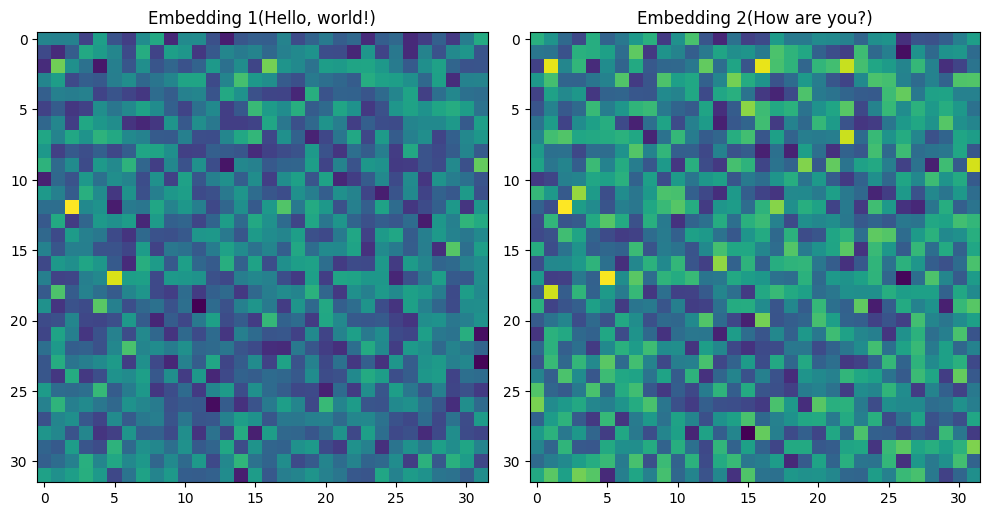

In [ ]:
# prompt: np.array(embedded_documents[0]).reshape(32,32),  np.array(embedded_documents[1]).reshape(32,32),  2 개 데이터를 한 행에 모두 시각화하라

import numpy as np
import matplotlib.pyplot as plt

# Assuming embedded_documents is defined as in the provided code

# Reshape the embeddings
arr1 = np.array(embedded_documents[0]).reshape(32, 32)
arr2 = np.array(embedded_documents[1]).reshape(32, 32)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first embedding
axes[0].imshow(arr1, cmap='viridis')  # Choose a suitable colormap
axes[0].set_title('Embedding 1(Hello, world!)')

# Plot the second embedding
axes[1].imshow(arr2, cmap='viridis')
axes[1].set_title('Embedding 2(How are you?)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


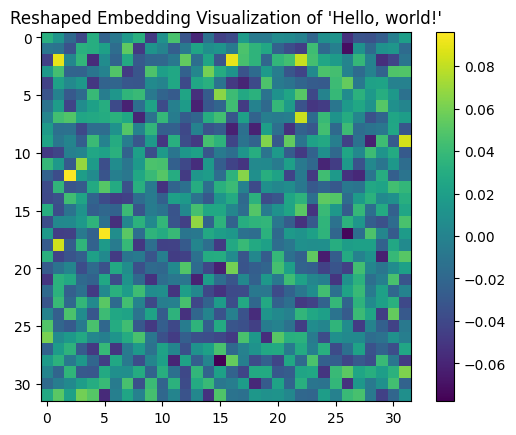

In [ ]:
reshaped_embedding = np.array(embedded_documents[1]).reshape(32, 32)

# Display the reshaped embedding as an image
plt.imshow(reshaped_embedding, cmap='viridis') # You can change the colormap if needed
plt.colorbar()
plt.title("Reshaped Embedding Visualization of 'Hello, world!'")
plt.show()

### https://projector.tensorflow.org/

In [ ]:
documents = []
for index, row in df.iterrows():
  page_content = f"이름: {row['이름']}, 국적: {row['국적']}, 주소: {row['주소']}, 전화번호: {row['전화번호']}"
  metadata = {'source': f"row_{index}"}
  documents.append(Document(page_content=page_content, metadata=metadata))

documents[:10]

[Document(metadata={'source': 'row_0'}, page_content="이름: Justin Glass, 국적: Lao People's Democratic Republic, 주소: 87921 Turner Course\nNew Tinamouth, SD 97352, 전화번호: +1-929-708-1003x390"),
 Document(metadata={'source': 'row_1'}, page_content='이름: Ryan Stone, 국적: Northern Mariana Islands, 주소: 174 Bright Ville\nLake Jonathanbury, NY 38386, 전화번호: 2192161461'),
 Document(metadata={'source': 'row_2'}, page_content='이름: Timothy Williams, 국적: Honduras, 주소: Unit 6619 Box 3451\nDPO AA 44093, 전화번호: 9614231007'),
 Document(metadata={'source': 'row_3'}, page_content='이름: Chelsea Hicks, 국적: Saint Martin, 주소: 616 Branch Alley Suite 940\nEast Phillip, PR 79408, 전화번호: +1-391-302-3740x9546'),
 Document(metadata={'source': 'row_4'}, page_content='이름: Kevin Sanchez, 국적: Netherlands Antilles, 주소: 97926 Courtney Inlet Apt. 933\nLake Cristina, OH 26268, 전화번호: +1-667-891-6011x08436'),
 Document(metadata={'source': 'row_5'}, page_content='이름: Linda Carter, 국적: China, 주소: USS Martinez\nFPO AA 73818, 전화번호: +1-2

<img src ='https://tribe-s3-production.imgix.net/v3E7WIPlNJIxi3lEVv67l?auto=compress,format&dl'>

In [ ]:
!pip install faiss-cpu  --quiet # Install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 34.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.vectorstores import FAISS

# 임베딩 모델 로딩
# embedding_model = OpenAIEmbeddings()////

# 문서 리스트를 벡터화해서 저장소에 넣기
vectorstore = FAISS.from_documents(documents, hf_embeddings)


이름: Doris Rivera, 국적: Nigeria, 주소: 3750 Lowery Turnpike Suite 985
New Jeffrey, RI 42377, 전화번호: (757)762-2927
이름: Nicholas Rivera, 국적: Western Sahara, 주소: 576 Curtis Road Apt. 222
South Benjamin, NH 78192, 전화번호: 001-411-530-2166x156
이름: Ryan Stone, 국적: Northern Mariana Islands, 주소: 174 Bright Ville
Lake Jonathanbury, NY 38386, 전화번호: 2192161461
이름: Amanda Rodriguez, 국적: Colombia, 주소: 798 Scott Harbors
Thompsonport, SC 72359, 전화번호: +1-574-876-5817


In [ ]:
vectorstore

In [ ]:
# 키워드 기반 검색
retrieved_docs = vectorstore.similarity_search("Rivera")
retrieved_docs

[Document(id='f89e209a-7194-432c-a452-de4b746fe9c5', metadata={'source': 'row_98'}, page_content='이름: Doris Rivera, 국적: Nigeria, 주소: 3750 Lowery Turnpike Suite 985\nNew Jeffrey, RI 42377, 전화번호: (757)762-2927'),
 Document(id='b9d5fe0b-e9f0-4573-b8f5-74282ebd88d4', metadata={'source': 'row_33'}, page_content='이름: Nicholas Rivera, 국적: Western Sahara, 주소: 576 Curtis Road Apt. 222\nSouth Benjamin, NH 78192, 전화번호: 001-411-530-2166x156'),
 Document(id='6003d109-b569-460b-9c14-c64ca4ffbb07', metadata={'source': 'row_1'}, page_content='이름: Ryan Stone, 국적: Northern Mariana Islands, 주소: 174 Bright Ville\nLake Jonathanbury, NY 38386, 전화번호: 2192161461'),
 Document(id='2010c01e-105f-455f-b04b-270915b3d8e6', metadata={'source': 'row_29'}, page_content='이름: Amanda Rodriguez, 국적: Colombia, 주소: 798 Scott Harbors\nThompsonport, SC 72359, 전화번호: +1-574-876-5817')]

In [ ]:
for doc in retrieved_docs:
    print(doc.page_content)
    print("")

이름: Doris Rivera, 국적: Nigeria, 주소: 3750 Lowery Turnpike Suite 985
New Jeffrey, RI 42377, 전화번호: (757)762-2927

이름: Nicholas Rivera, 국적: Western Sahara, 주소: 576 Curtis Road Apt. 222
South Benjamin, NH 78192, 전화번호: 001-411-530-2166x156

이름: Ryan Stone, 국적: Northern Mariana Islands, 주소: 174 Bright Ville
Lake Jonathanbury, NY 38386, 전화번호: 2192161461

이름: Amanda Rodriguez, 국적: Colombia, 주소: 798 Scott Harbors
Thompsonport, SC 72359, 전화번호: +1-574-876-5817



In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from gensim.models import Word2Vec

# 샘플 문장 데이터
sentences = [
    ["나는", "자연어처리를", "좋아한다"],
    ["자연어처리는", "재미있는", "분야이다"],
    ["나는", "머신러닝도", "좋아한다"],
    ["딥러닝은", "자연어처리에", "자주", "사용된다"]
]

# Word2Vec 모델 학습
model = Word2Vec(sentences,
                 vector_size=100,
                 window=5,
                 min_count=1, workers=2, sg=1)

# 단어 벡터 확인
print("✅ '자연어처리'의 벡터:")
print(model.wv['자연어처리'])

# 유사한 단어 찾기
print("\n✅ '자연어처리'와 유사한 단어:")
similar_words = model.wv.most_similar("자연어처리", topn=3)
for word, score in similar_words:
    print(f"{word} ({score:.4f})")


ModuleNotFoundError: No module named 'numpy.strings'